# Statistical inference

- confidence intervals

- hypothesis tests

## Example 1. Confidence interval for the mean. 

Confidence interval for the average height of males in the students population. 

(I assume that the sample collected in the survey is representative for the student population.)

In [71]:
import pandas as pd

csv_url = "https://docs.google.com/spreadsheets/d/1H6b5mkq68MeRQyP0Cr2weCpVkzmpR0c2Oi7p147o2a0/export?format=csv"

# Read the sheet into a DataFrame
d = pd.read_csv(csv_url)

print(d.head())

   height  handedness  right_hand_span  left_hand_span  head_circ eye_colour  \
0     159        0.88             19.0            19.0       54.0       Blue   
1     160       -1.00             19.0            20.0       57.0      Green   
2     161        0.79             17.0            16.5       57.0      hazel   
3     162        0.79             16.0            16.0       57.0       gray   
4     162        0.79             16.0            16.0       54.0      Brown   

   gender  siblings  movies  soda   bedtime       fb_freq  fb_friends  \
0  Female         2     3.0   7.0  02:00:00    once a day       135.0   
1  Female         2     0.5   2.0  04:30:00             0         1.0   
2  Female         3     3.0   2.0  23:50:00   once a week       354.0   
3  Female         2     0.0   2.0  23:10:00  almost never       192.0   
4  Female         2     1.0   3.0  00:00:00         never         1.0   

                  stat_likert  
0  Neither agree nor disagree  
1              S

In [72]:
import numpy as np
mask = d['gender']=="Male"
print(np.sum(mask))
print(np.mean(d['height'][mask]))

36
181.91666666666666


(https://bookdown.org/blazej_kochanski/statistics2/ci-mean.html#templates-3)

In [73]:
import numpy as np
from scipy import stats

data = d['height'][mask]
test_result = stats.ttest_1samp(data, popmean=np.mean(data))
conf_int = test_result.confidence_interval(0.95)
print(conf_int)

ConfidenceInterval(low=np.float64(179.07845998200804), high=np.float64(184.75487335132527))


Based on our sample (with n=36 observations) we find that the 95-percent confidence interval for the population mean is (179.08; 184.75). 

## Example 2. Correlation between height and head circumference

In [74]:
# correlation between the height and head size in the sample:

from scipy import stats
mask2 = d['head_circ'].notna()
r = stats.pearsonr(d['height'][mask2], d['head_circ'][mask2])
print(r)

PearsonRResult(statistic=np.float64(0.5689345917702635), pvalue=np.float64(2.582305399535021e-06))


(https://bookdown.org/blazej_kochanski/statistics2/other.html)

In [80]:
import scipy.stats as stats
import numpy as np
import math as math

x = d['height'][mask2]
y = d['head_circ'][mask2]

correlation_test = stats.pearsonr(x, y)
confidence_interval = correlation_test.confidence_interval(0.95)

print('Test:\n\n', correlation_test, '\n\n Confidence interval: \n\n', confidence_interval)

Test:

 PearsonRResult(statistic=np.float64(0.5689345917702635), pvalue=np.float64(2.582305399535021e-06)) 

 Confidence interval: 

 ConfidenceInterval(low=np.float64(0.366206417384293), high=np.float64(0.7201022444623262))


The 95-percent confidence interval for the population correlation coefficient $\rho$ is (0.366; 0.720).

## Example 3. Confidence interval for Cramer's V

In [76]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
d['eye2'] = "Other"
d.loc[d['eye_colour']=="Brown", 'eye2'] = "Brown"
d.loc[d['eye_colour']=="Blue", 'eye2'] = "Blue"
d.loc[d['eye_colour']=="Green", 'eye2'] = "Green"
print(pd.crosstab(d['eye2'], d['gender']))
def cramers_v(x, y):
    """
    Compute Cramér's V statistic for categorical-categorical association.

    Parameters:
        x (pd.Series): Categorical variable.
        y (pd.Series): Categorical variable.

    Returns:
        float: Cramér's V value between 0 and 1.
    """
    # Create a contingency table
    cont_table = pd.crosstab(x, y)

    # Compute chi-squared statistic
    chi2 = chi2_contingency(cont_table)[0]

    # Get sample size and minimum dimension
    n = cont_table.sum().sum()
    k = min(cont_table.shape) - 1

    # Compute Cramér's V
    v = np.sqrt(chi2 / (n * k))
    return v

print(cramers_v(d['eye2'], d['gender']))

gender  Female  Male
eye2                
Blue         8    13
Brown        9    11
Green        3     9
Other        4     3
0.19245008972987526


We use [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)). 
We take 1000 n=60 re-samples from the population and calculate Cramer's V each time. 

(array([ 21.,  64., 131., 188., 229., 170., 104.,  70.,  18.,   5.]),
 array([0.03006516, 0.0849402 , 0.13981525, 0.19469029, 0.24956533,
        0.30444038, 0.35931542, 0.41419046, 0.4690655 , 0.52394055,
        0.57881559]),
 <BarContainer object of 10 artists>)

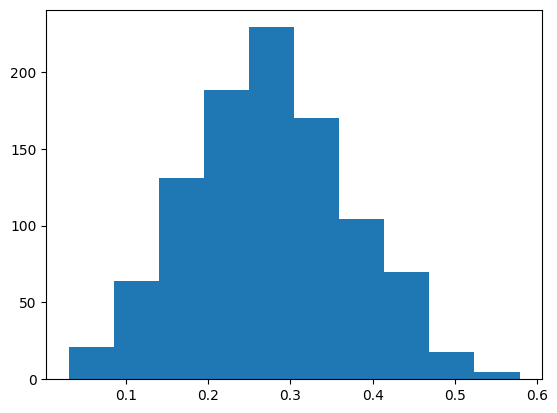

In [77]:
nsim = 1000
n=len(d['eye2'])
def sim():
    indices = np.random.choice(n, n, replace=True)
    bootstrap_sample = d.iloc[indices]
    return(cramers_v(bootstrap_sample['eye2'], bootstrap_sample['gender']))

results = [sim() for _ in range(nsim)]

import matplotlib.pyplot as plt
plt.hist(results)

The simplest way to obtain a confidence interval from bootstrap results is to take the corresponding quantiles. For a 95% confidence interval, you cut off the lowest 2.5% and the highest 2.5% of the observations.

In [78]:
np.quantile(results, [0.025, 0.975])

array([0.08883585, 0.46673832])

Please note that the above computation is based on a simulation, so the results will vary each time the code is re-run.